# Import Libraries

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaneddata.csv")
display(df)
pd.options.display.float_format = '{:.2f}'.format

url        city state  \
0    /realestateandhomes-detail/135-Tunnel-Rd_Berke...    berkeley    CA   
1    /realestateandhomes-detail/2611-Derby-St_Berke...    berkeley    CA   
2    /realestateandhomes-detail/161-Tamalpais-Rd_Be...    berkeley    CA   
3    /realestateandhomes-detail/490-Panoramic-Way_B...    berkeley    CA   
4    /realestateandhomes-detail/2690-Shasta-Rd_Berk...    berkeley    CA   
..                                                 ...         ...   ...   
976  /realestateandhomes-detail/2501-Heritage-Way_U...  union-city    CA   
977  /realestateandhomes-detail/33761-10th-St_Union...  union-city    CA   
978  /realestateandhomes-detail/30940-Granger-Ave_U...  union-city    CA   
979  /realestateandhomes-detail/33627-14th-St_Union...  union-city    CA   
980  /realestateandhomes-detail/4709-Rose-Way_Union...  union-city    CA   

        street_address  zipcode  bed  bath    sqft  lotsize      price  \
0        135 tunnel rd    94705  4.0   2.5  2904.0   5814.0  1949000.0   
1        2611 derby st    94705  5.0   2.5  2377.0   3400.0  1795000.0   
2     161 tamalpais rd    94708  2.0   2.0  1480.0   7713.0  1095000.0   
3    490 panoramic way    94704  2.0   2.0  1125.0   5984.0   899000.0   
4       2690 shasta rd    94708  3.0   2.5  3070.0   6507.0  1595000.0   
..                 ...      ...  ...   ...     ...      ...        ...   
976  2501 heritage way    94587  4.0   2.0  2193.0   6003.0  1699888.0   
977      33761 10th st    94587  3.0   2.0  1054.0   5000.0   898000.0   
978  30940 granger ave    94587  3.0   2.0  1230.0   6215.0  1150000.0   
979      33627 14th st    94587  4.0   2.0  1685.0   5000.0  1199000.0   
980      4709 rose way    94587  5.0   3.0  2109.0   6930.0  1599000.0   

     property_type  hoa_monthly  price_per_sqft  parking_space    year  \
0    single family          NaN           671.0            NaN  1912.0   
1    single family          NaN           755.0            NaN  1925.0   
2    single family          NaN           740.0            NaN  1983.0   
3    single family          NaN           799.0            NaN  1948.0   
4    single family          NaN           520.0            NaN  1979.0   
..             ...          ...             ...            ...     ...   
976  single family          NaN           775.0            3.0  1998.0   
977  single family          NaN           852.0            2.0  1960.0   
978  single family          NaN           935.0            2.0  1979.0   
979  single family          NaN           712.0            2.0  2007.0   
980  single family          NaN           758.0            2.0  1973.0   

     median_home_price  median_selling_price  mhp_per_sqft  \
0            1495000.0             1550000.0         691.0   
1            1495000.0             1550000.0         691.0   
2            1300000.0             1915000.0         804.0   
3             899000.0              900000.0         818.0   
4            1300000.0             1915000.0         804.0   
..                 ...                   ...           ...   
976          1187000.0             1150000.0         757.0   
977           994444.0                   NaN         907.0   
978          1614000.0             1790000.0         746.0   
979           994444.0                   NaN         907.0   
980                NaN                   NaN           NaN   

              school_district                       broker  
0     berkeley (510) 644-6150                the grubb co.  
1     berkeley (510) 644-6150                            -  
2     berkeley (510) 644-6150                            -  
3     berkeley (510) 644-6150                            -  
4                           -                      compass  
..                        ...                          ...  
976  new haven (510) 471-1100  legacy real estate & assoc.  
977  new haven (510) 471-1100       coldwell banker realty  
978                         -                            -  
979  

# Analyzing Heat Maps
First we are analyzing the entire data by using heat maps to get an overview of what variables have an influence on price. By doing this we can get a better idea of the data and it will help us in making decisions for the next steps of data preparation and data analysis.

Text(0.5, 1.0, 'pearson correlation')

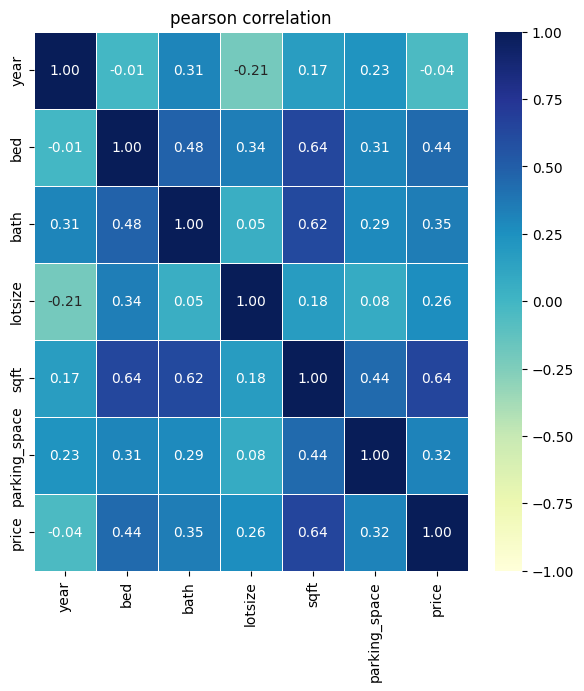

In [2]:
#Visualizing heat map to show the correlation among variables
df_heat=df[['year','bed','bath','lotsize','sqft','parking_space','price']]
fig, ax = plt.subplots(figsize=(7,7))      
corr_matrix = df_heat.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax = ax)
plt.title("pearson correlation")

From the above matrix we can see that there appears to be a a moderate positive relationship between price and number of beds, price and number of bath, price and lot size, price and square feet. So we can somewhat conclude that the factors influencing price are mix of beds,bath,lot size and square feet.

Also, we can see that year the property is built in has no influence on price as it has no relationship.

# Scatter plot showing relationship between price and squarefeet

In [3]:
fig = px.scatter(df,'sqft','price',color = 'property_type',opacity = .8)
fig.show()

We can see a positive relationship between square feet and price. Also we can observe that most listed properties are clustered under the price range of 2M and under 2000 square feet. 

In [4]:
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode'].dtype

dtype('O')

In [5]:
#Getting data for only one zipcode to analyze the trends in that zip code
groupbyzip=df.groupby('zipcode')[['city','zipcode','bed','bath','sqft','price','price_per_sqft','year']].get_group('94587')
groupbyzip

city zipcode  bed  bath    sqft      price  price_per_sqft    year
919  union-city   94587 4.00  2.00 1544.00 1429999.00          926.00 1975.00
920  union-city   94587 5.00  2.00 1926.00 1450000.00          753.00 1974.00
921  union-city   94587 3.00  2.00 1374.00 1150000.00          837.00 1975.00
922  union-city   94587 4.00  2.50 1907.00 1398000.00          733.00 1972.00
923  union-city   94587 4.00  2.00 1888.00 1274900.00          675.00 1968.00
..          ...     ...  ...   ...     ...        ...             ...     ...
976  union-city   94587 4.00  2.00 2193.00 1699888.00          775.00 1998.00
977  union-city   94587 3.00  2.00 1054.00  898000.00          852.00 1960.00
978  union-city   94587 3.00  2.00 1230.00 1150000.00          935.00 1979.00
979  union-city   94587 4.00  2.00 1685.00 1199000.00          712.00 2007.00
980  union-city   94587 5.00  3.00 2109.00 1599000.00          758.00 1973.00

[62 rows x 8 columns]

In [6]:
fig = px.scatter(groupbyzip,'bed','price')
fig.show()

So if we look at just properties listed in union city we can see that there are not much options for 2 or 5 beds and we have more options for 3 and 4 beds. Although there is wide overlap between 3 and 4 beds price range, the properties listed with 3 beds appear to be properly skewed from its median however properties with 4 beds appears to be right skewed.
The trend would be clearly visible once we take the mean prices.

In [120]:
#Lets see how prices vary by bed by taking average mean price 

beds = df['bed'].unique()
mean = pd.DataFrame(columns=['bed','mean_price'])
for bed in beds:
    groupbybeds = df.groupby('bed').get_group(bed)
    mean_price = groupbybeds['price'].mean()
    mean.loc[len(mean.index)] = [bed, mean_price]

display(mean)
fig = px.scatter(mean,'bed','mean_price')
fig.show()


bed  mean_price
0 4.00  1668768.88
1 5.00  1739541.31
2 2.00   983762.32
3 3.00  1332438.75

We can see that the number of beds has substantial influence on the mean price of the properties.

In [8]:
#Lets see how prices vary by bath
baths = df['bath'].unique()
mean = pd.DataFrame(columns=['bath','mean_price'])
for bath in baths:
    groupbybaths = df.groupby('bath').get_group(bath)
    mean_price = groupbybaths['price'].mean()
    mean.loc[len(mean.index)] = [bath, mean_price]

display(mean)
fig = px.scatter(mean,'bath','mean_price')
fig.show()

bath  mean_price
0  2.50  1505147.89
1  2.00  1306918.64
2  1.50  1032251.86
3  3.00  1717964.01

We can see that the number of baths has substantial influence on the mean price of the properties.

In [9]:
#calculating age of the house and adding the age calculated column to new dataframe
age=2022-df['year']
df['age_of_house'] = age
df_age=df[['zipcode','age_of_house','price']]
df_age

zipcode  age_of_house      price
0     94705        110.00 1949000.00
1     94705         97.00 1795000.00
2     94708         39.00 1095000.00
3     94704         74.00  899000.00
4     94708         43.00 1595000.00
..      ...           ...        ...
976   94587         24.00 1699888.00
977   94587         62.00  898000.00
978   94587         43.00 1150000.00
979   94587         15.00 1199000.00
980   94587         49.00 1599000.00

[981 rows x 3 columns]

In [10]:
zipcode_grp = df.groupby('zipcode')
display(zipcode_grp)

In [11]:
#Calculating mean age of the properties based on zipcodes
mean_age = zipcode_grp.age_of_house.mean()
mean_age = mean_age.sort_values(ascending=False)
df_mean_age=pd.DataFrame(mean_age)
df_mean_age.rename(columns = {'age_of_house':'avg_age_of_house'}, inplace = True)
df_mean_age.reset_index(inplace=True)  
display(df_mean_age)

zipcode  avg_age_of_house
0    94108            109.00
1    94704            105.00
2    94117            100.80
3    94703             98.75
4    94121             97.83
..     ...               ...
74   94118             21.33
75   95135             17.00
76   95138             17.00
77   94107             15.50
78   94158             12.00

[79 rows x 2 columns]

In [12]:
#Calculating mean price of the properties based on zipcodes
mean_value = zipcode_grp.price.mean()
mean_value = mean_value.sort_values(ascending=False)
df_mean_value=pd.DataFrame(mean_value)
df_mean_value.rename(columns = {'price':'avg_price'}, inplace = True)
df_mean_value.reset_index(inplace=True)
display(df_mean_value)

zipcode  avg_price
0    94123 2573500.00
1    95138 2500000.00
2    94087 2274799.14
3    94133 2173500.00
4    94402 2164892.55
..     ...        ...
74   94541  901214.29
75   95131  878500.00
76   94545  861250.32
77   94709  775000.00
78   94546  547300.00

[79 rows x 2 columns]

In [13]:
final_df = pd.merge(df_mean_age, df_mean_value,on='zipcode')
final_df['avg_age_of_house'] = final_df['avg_age_of_house']
final_df=final_df.sort_values('avg_price')
display(final_df)

zipcode  avg_age_of_house  avg_price
52   94546             45.60  547300.00
13   94709             90.00  775000.00
33   94545             54.35  861250.32
71   95131             30.00  878500.00
39   94541             52.05  901214.29
..     ...               ...        ...
22   94402             61.77 2164892.55
67   94133             36.50 2173500.00
29   94087             57.11 2274799.14
76   95138             17.00 2500000.00
8    94123             93.50 2573500.00

[79 rows x 3 columns]

# Relationship between the price and the year the property is built in.

In [14]:
fig = px.scatter(final_df,'avg_age_of_house','avg_price',color = 'zipcode',opacity = .8)
fig.show()

We can clear not see any relationship between the price and the year the property is built in. 
Fun Fact: We can see that there the number of houses built between the age 60 and 80 i.e around year 1950 are comparatively low which could be because of certain war conditions or any other factor.

# The highest potential to be another real estate hot spots in East Bay.

In [15]:
df_hotspot = df.groupby('city')
f = df_hotspot.get_group('fremont')
h = df_hotspot.get_group('hayward')
u = df_hotspot.get_group('union-city')
b = df_hotspot.get_group('berkeley')

df_hotspot = pd.concat([f, h, u, b])
df_hotspot.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 100 to 53
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   431 non-null    object 
 1   city                  431 non-null    object 
 2   state                 431 non-null    object 
 3   street_address        431 non-null    object 
 4   zipcode               431 non-null    object 
 5   bed                   431 non-null    float64
 6   bath                  431 non-null    float64
 7   sqft                  431 non-null    float64
 8   lotsize               431 non-null    float64
 9   price                 431 non-null    float64
 10  property_type         431 non-null    object 
 11  hoa_monthly           137 non-null    float64
 12  price_per_sqft        431 non-null    float64
 13  parking_space         350 non-null    float64
 14  year                  429 non-null    float64
 15  median_home_price     

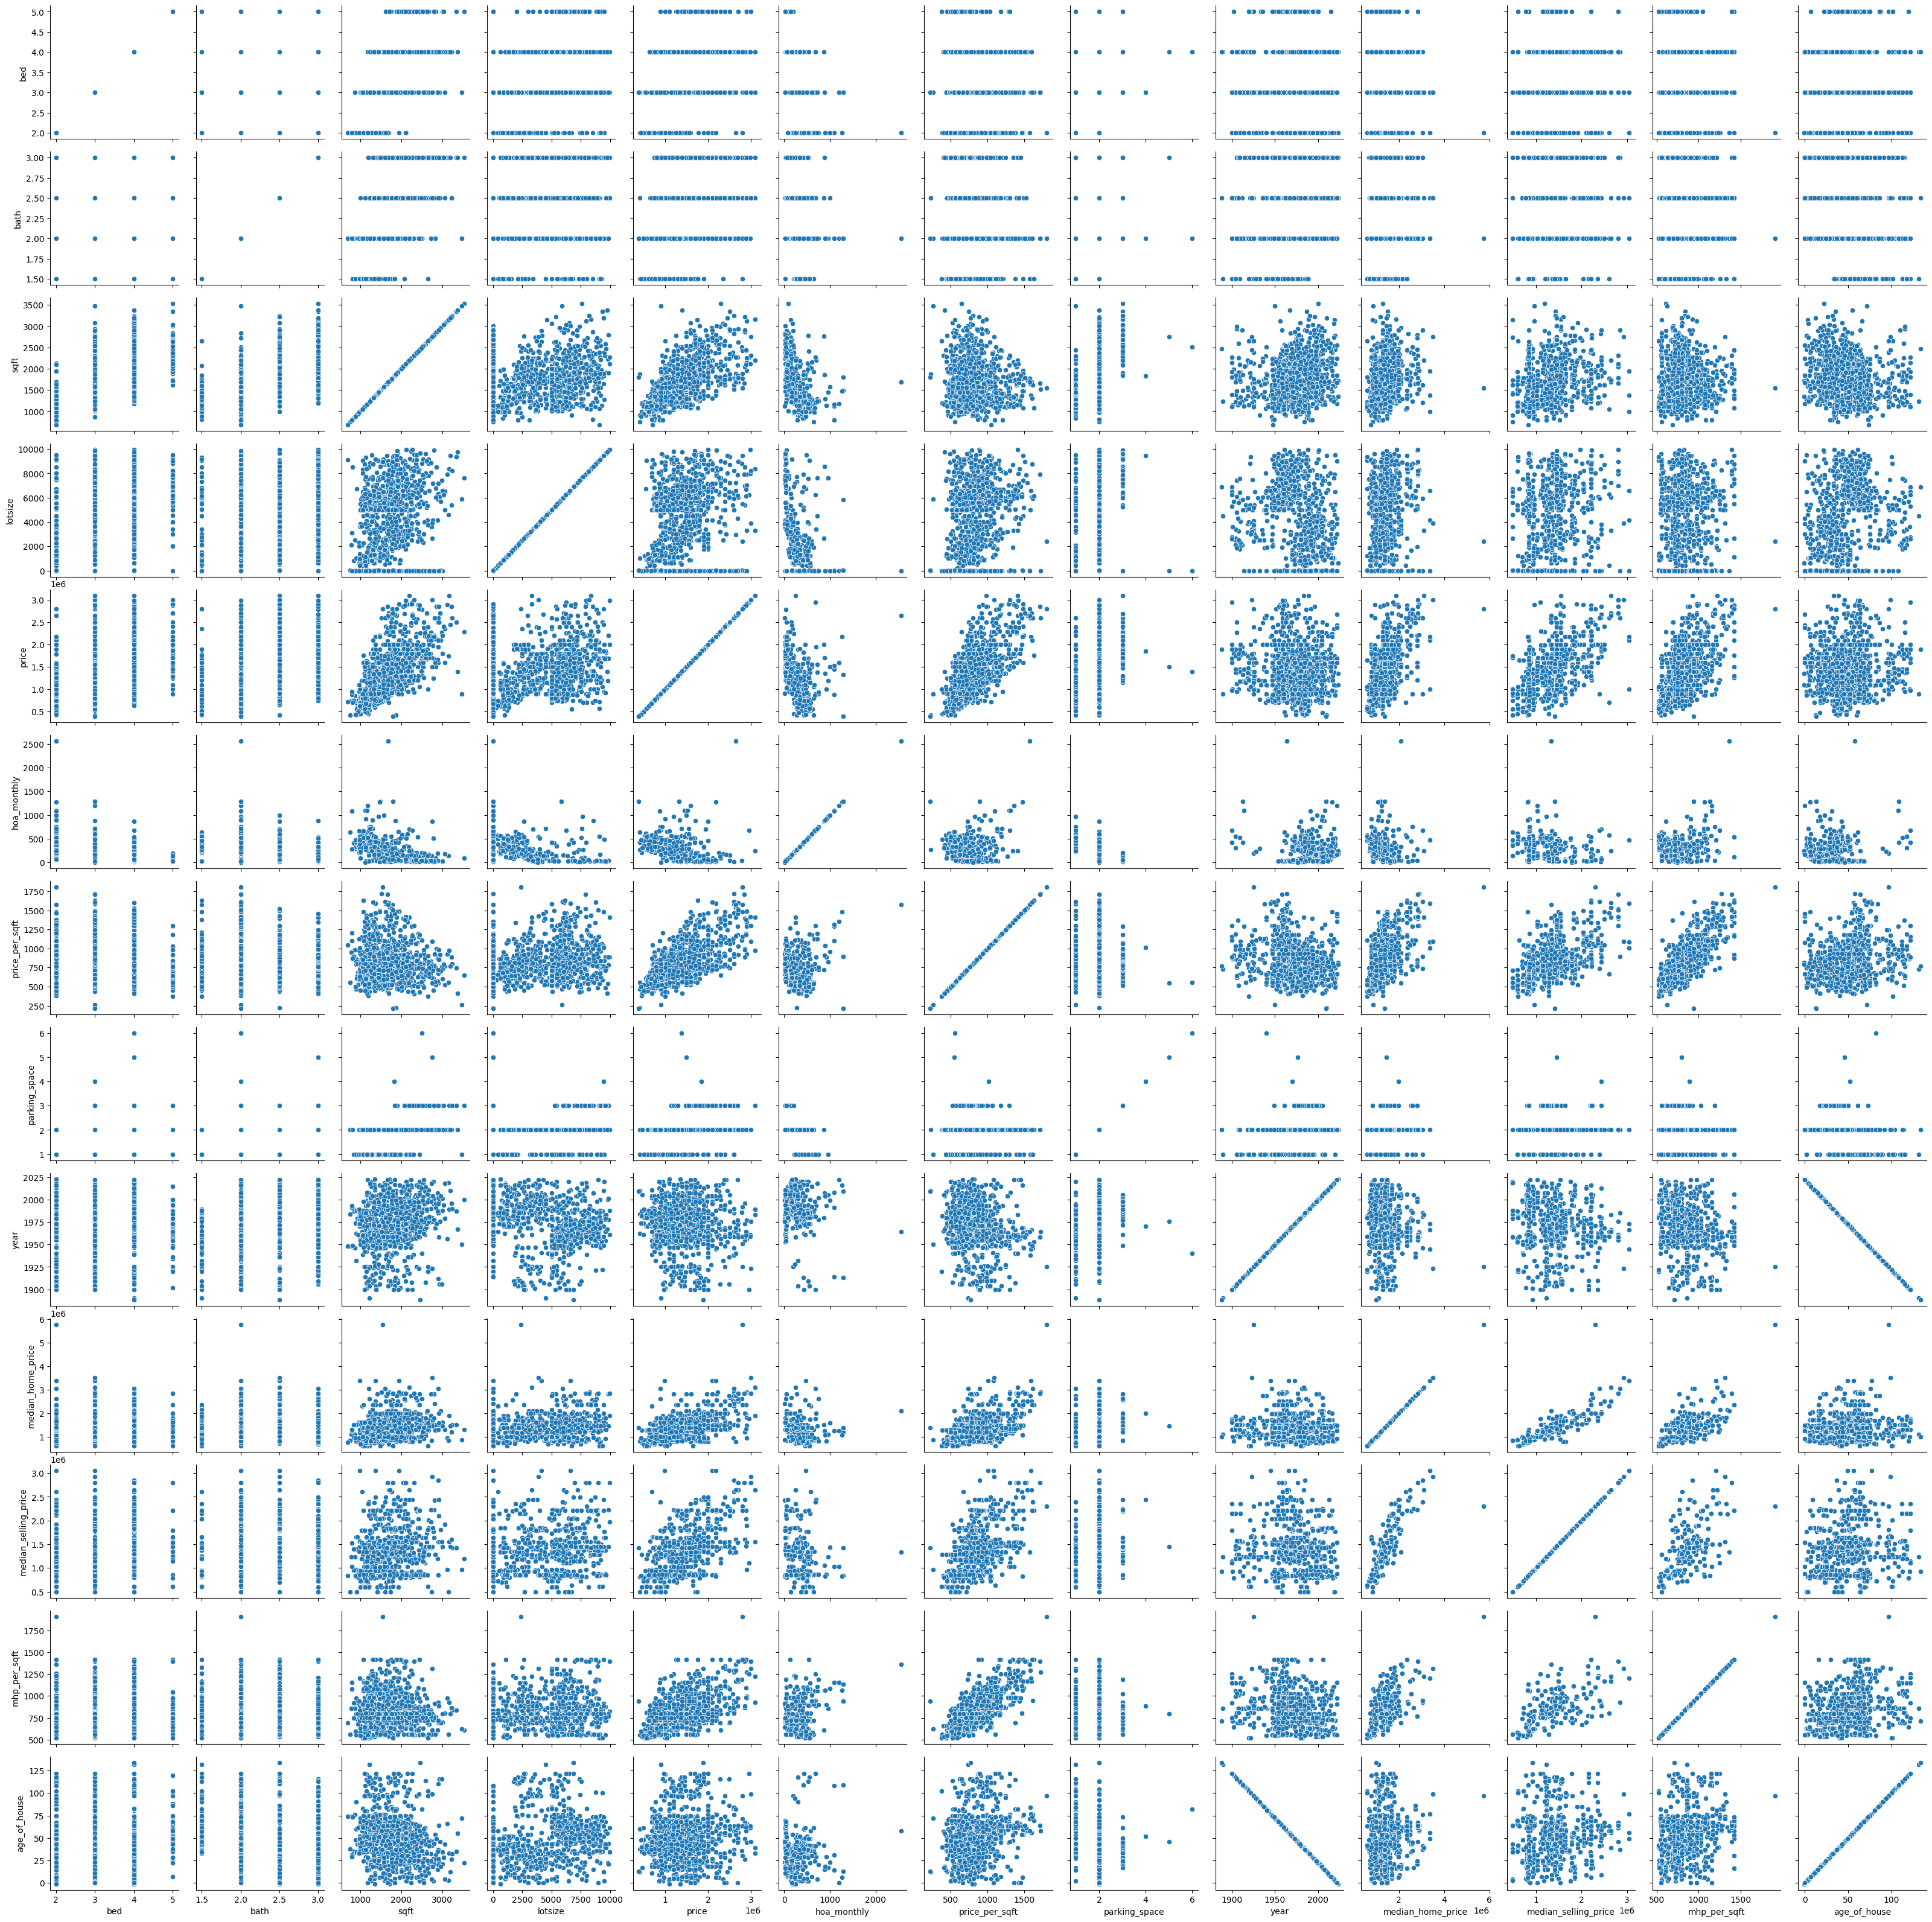

In [16]:
# Visualize Correlation

cogi = sns.PairGrid(df)
cogi.map(sns.scatterplot);
print(cogi)

# Essentially there aren't any strong correlations other than what's expected. Sqft-price
# price-median selling price, sqft-lotsize, etc

In [17]:
# price, bed by location
# Fremont, Union City, Hayward 
fig = px.scatter(df_hotspot, x="bed", y="price", color='city')
fig.show()

In [18]:
# Choosing variables for k-means
X = np.array(df_hotspot.loc[:, ['price', 'bed', 'bath']])      #.reshape(-1,2)
X.shape

(431, 3)

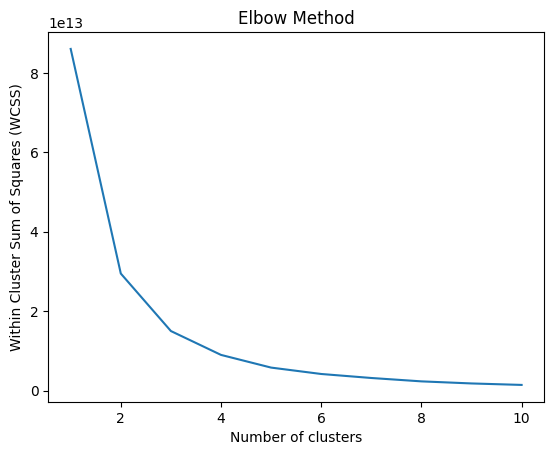

In [19]:
# Using elbow method to determine optimal cluster number
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    
    model.fit(X)
    wcss.append(model.inertia_)
    
# Show elbow plot
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

# Kmeans Cluster Analysis

In [20]:
kmeans = KMeans(n_clusters = 5,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)
cluster_dict = {}
for i in range(len(pred_y)):
    if pred_y[i] in cluster_dict:
        cluster_dict[pred_y[i]].append(X[i])
    else:
        cluster_dict[pred_y[i]] = []
        cluster_dict[pred_y[i]].append(X[i])
        
#print(cluster_dict)
cluster_bed = {0:[0,0,0,0,0,0,0], 1:[0,0,0,0,0,0,0], 2: [0,0,0,0,0,0,0], 3:[0,0,0,0,0,0,0], 4:[0,0,0,0,0,0,0]}

for key in cluster_dict:
    for vals in cluster_dict[key]:
        cluster_bed[key][int(vals[1])]+=1
print(cluster_bed)

# # Plot the data
# plt.scatter(X[:,0], 
#             X[:,1])

# # Plot the clusters 
# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')                           # Set centroid color
# plt.show()

{0: [0, 0, 7, 62, 51, 5, 0], 1: [0, 0, 51, 39, 8, 0, 0], 2: [0, 0, 0, 3, 10, 1, 0], 3: [0, 0, 1, 19, 47, 11, 0], 4: [0, 0, 8, 78, 28, 2, 0]}


In [21]:
# price, bed by location
 
fig = px.scatter(df_hotspot, x="bed", y="price", color='city')
fig.show()



# Housing price comparing with other big cities in US.

In [22]:
#Import the data
df_othercities = pd.read_csv("OtherCities.csv")
df_othercities.head()

url    city state  \
0  /realestateandhomes-detail/304-Neponset-Ave-Ap...  Boston    MA   
1  /realestateandhomes-detail/776-Boylston-St-Uni...  Boston    MA   
2  /realestateandhomes-detail/828-830-E-5th-St-Un...  Boston    MA   
3  /realestateandhomes-detail/1-Avery-St-Apt-10A_...  Boston    MA   
4  /realestateandhomes-detail/1-Dalton-St-Unit-28...  Boston    MA   

              street-address  zipcode       sqft         price price/sqft  
0     304 Neponset Ave Apt 1     2122  1,273sqft     $639,000       $502   
1  776 Boylston St Unit W11A     2199  3,168sqft  $10,800,000     $3,409   
2    828-830 E 5th St Unit 5     2127    640sqft     $499,000       $780   
3         1 Avery St Apt 10A     2111  1,382sqft   $1,200,000       $868   
4      1 Dalton St Unit 2805     2115  2,182sqft   $6,200,000     $2,841

Note: we are attaching Othercities.csv file which we have scrapped the data exactly how we did for all the cities in Bayarea.

In [23]:
df.head(5)

url      city state  \
0  /realestateandhomes-detail/135-Tunnel-Rd_Berke...  berkeley    CA   
1  /realestateandhomes-detail/2611-Derby-St_Berke...  berkeley    CA   
2  /realestateandhomes-detail/161-Tamalpais-Rd_Be...  berkeley    CA   
3  /realestateandhomes-detail/490-Panoramic-Way_B...  berkeley    CA   
4  /realestateandhomes-detail/2690-Shasta-Rd_Berk...  berkeley    CA   

      street_address zipcode  bed  bath    sqft  lotsize      price  ...  \
0      135 tunnel rd   94705 4.00  2.50 2904.00  5814.00 1949000.00  ...   
1      2611 derby st   94705 5.00  2.50 2377.00  3400.00 1795000.00  ...   
2   161 tamalpais rd   94708 2.00  2.00 1480.00  7713.00 1095000.00  ...   
3  490 panoramic way   94704 2.00  2.00 1125.00  5984.00  899000.00  ...   
4     2690 shasta rd   94708 3.00  2.50 3070.00  6507.00 1595000.00  ...   

  hoa_monthly  price_per_sqft  parking_space    year  median_home_price  \
0         NaN          671.00            NaN 1912.00         1495000.00   
1         NaN          755.00            NaN 1925.00         1495000.00   
2         NaN          740.00            NaN 1983.00         1300000.00   
3         NaN          799.00            NaN 1948.00          899000.00   
4         NaN          520.00            NaN 1979.00         1300000.00   

   median_selling_price  mhp_per_sqft          school_district         broker  \
0            1550000.00        691.00  berkeley (510) 644-6150  the grubb co.   
1            1550000.00        691.00  berkeley (510) 644-6150              -   
2            1915000.00        804.00  berkeley (510) 644-6150              -   
3             900000.00        818.00  berkeley (510) 644-6150              -   
4            1915000.00        804.00                        -        compass   

  age_of_house  
0       110.00  
1        97.00  
2        39.00  
3        74.00  
4        43.00  

[5 rows x 21 columns]

In [24]:
df_othercities.info()
#df.groupby('city').plot(x='url',y='price/sqft')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             495 non-null    object
 1   city            495 non-null    object
 2   state           495 non-null    object
 3   street-address  495 non-null    object
 4   zipcode         495 non-null    int64 
 5   sqft            495 non-null    object
 6   price           495 non-null    object
 7   price/sqft      467 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.1+ KB


In [25]:
df_othercities.shape

(495, 8)

In [26]:

character = ["$","sqft",","]
for char in character:
    df_othercities['price'] = df_othercities['price'].str.replace(char, '', regex=False)
    df_othercities['sqft'] =df_othercities['sqft'].str.replace(char, '', regex=False)
    df_othercities['price/sqft'] = df_othercities['price/sqft'].str.replace(char, '', regex=False)
    
character =["-"]
for char in character:
    df_othercities['sqft']=df_othercities['sqft'].replace(char, np.nan)

In [27]:
df_othercities = df_othercities.rename(columns={"price/sqft":"price_per_sqft"})

In [28]:
duplicaterow = df_othercities[df_othercities.duplicated()]
duplicaterow.count()

url               7
city              7
state             7
street-address    7
zipcode           7
sqft              7
price             7
price_per_sqft    7
dtype: int64

In [29]:
#Remove duplicate values
df_othercities=df_othercities.drop_duplicates()

In [30]:
df_othercities.shape

(488, 8)

In [31]:
df_othercities.isna().sum()

url                0
city               0
state              0
street-address     0
zipcode            0
sqft              28
price              0
price_per_sqft    28
dtype: int64

In [32]:
#Drop records with missing values for signifcant columns 
df_othercities=df_othercities.dropna(subset=['sqft','price_per_sqft'])

In [33]:
df_othercities = df_othercities.astype({'price':'float','sqft':'float','price_per_sqft':'float'})

In [34]:
df_othercities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 494
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             460 non-null    object 
 1   city            460 non-null    object 
 2   state           460 non-null    object 
 3   street-address  460 non-null    object 
 4   zipcode         460 non-null    int64  
 5   sqft            460 non-null    float64
 6   price           460 non-null    float64
 7   price_per_sqft  460 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 32.3+ KB


In [35]:
#removing outliers
def pruneOutliers(df_othercities,col):
    quartile_1 = df_othercities[col].quantile(0.25)
    quartile_3 = df_othercities[col].quantile(0.75)
    iqr = quartile_3 - quartile_1
    ul = quartile_3+1.5*iqr
    ll = quartile_1-1.5*iqr
    new_df = df_othercities[(df_othercities[col] > ll) & (df_othercities[col] < ul)]
    return new_df

In [36]:
df_othercities=pruneOutliers(df_othercities,'price')
df_othercities=pruneOutliers(df_othercities,'sqft')
df_othercities=pruneOutliers(df_othercities,'price_per_sqft')

In [37]:
df_othercities.shape

(385, 8)

In [38]:
#df.groupby('city').plot(x='url',y='price_per_sqft')
mean_price_per_sqft =df_othercities.groupby('city').mean()['price_per_sqft']

/var/folders/vy/c5qhhm553sl51j4kkxz3d3mc0000gn/T/ipykernel_51991/2191342886.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [39]:
mean_price_per_sqft

city
Austin        386.76
Boston        720.46
Chicago       240.64
Los-Angeles   725.12
Seattle       570.48
Name: price_per_sqft, dtype: float64

In [40]:
mean_price_per_city=mean_price_per_sqft.append(df.groupby('city').mean()['price_per_sqft'])

/var/folders/vy/c5qhhm553sl51j4kkxz3d3mc0000gn/T/ipykernel_51991/2606147475.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/vy/c5qhhm553sl51j4kkxz3d3mc0000gn/T/ipykernel_51991/2606147475.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [41]:
mean_price_per_city

city
Austin           386.76
Boston           720.46
Chicago          240.64
Los-Angeles      725.12
Seattle          570.48
berkeley         828.63
dublin           768.87
fremont          896.21
hayward          600.80
pleasanton       802.30
san-francisco   1029.00
san-jose         865.59
san-mateo       1100.10
san-ramon        747.17
sunnyvale       1184.67
union-city       753.61
Name: price_per_sqft, dtype: float64

# Import libraries for Regresssion

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statistics import median
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objs as go
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error


from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV

from sklearn import preprocessing  
from numpy import median
import itertools 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.impute import KNNImputer   
from pandas.plotting import scatter_matrix  

from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
from sklearn.metrics import mean_absolute_error as mae
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import statsmodels.formula.api as sm
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import lime
import lime.lime_tabular

# Packages required: Pandas, Numpy, Pathlib, Seaborn, Matplot, Scipy, Plotly, Sklearn, Statistic, Itertools, Pyforest, Lazypredict, Lime, Math, Statsmodels.

In [51]:
df=pd.read_csv("cleaneddata.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   981 non-null    object 
 1   city                  981 non-null    object 
 2   state                 981 non-null    object 
 3   street_address        981 non-null    object 
 4   zipcode               981 non-null    int64  
 5   bed                   981 non-null    float64
 6   bath                  981 non-null    float64
 7   sqft                  981 non-null    float64
 8   lotsize               981 non-null    float64
 9   price                 981 non-null    float64
 10  property_type         981 non-null    object 
 11  hoa_monthly           359 non-null    float64
 12  price_per_sqft        981 non-null    float64
 13  parking_space         790 non-null    float64
 14  year                  978 non-null    float64
 15  median_home_price     8

In [53]:
df.describe()

zipcode    bed   bath    sqft  lotsize      price  hoa_monthly  \
count   981.00 981.00 981.00  981.00   981.00     981.00       359.00   
mean  94583.36   3.33   2.30 1725.45  4459.59 1425050.91       306.92   
std     276.24   0.80   0.43  515.06  2843.39  537351.85       264.83   
min   94085.00   2.00   1.50  683.00     0.23  389000.00         1.00   
25%   94538.00   3.00   2.00 1312.00  1932.00  998000.00       103.00   
50%   94546.00   3.00   2.00 1674.00  5096.00 1359000.00       275.00   
75%   94587.00   4.00   2.50 2055.00  6503.00 1749000.00       427.50   
max   95148.00   5.00   3.00 3531.00  9968.00 3098888.00      2557.00   

       price_per_sqft  parking_space    year  median_home_price  \
count          981.00         790.00  978.00             828.00   
mean           836.01           1.94 1971.18         1399520.30   
std            243.28           0.48   24.97          518639.72   
min            216.00           1.00 1888.00          598888.00   
25%            668.00           2.00 1958.00          998000.00   
50%            795.00           2.00 1971.50         1301500.00   
75%            968.00           2.00 1988.00         1614000.00   
max           1804.00           6.00 2023.00         5747500.00   

       median_selling_price  mhp_per_sqft  
count                753.00        828.00  
mean             1376120.32        836.05  
std               490310.67        196.08  
min               495000.00        522.00  
25%               945000.00        710.00  
50%              1350000.00        798.00  
75%              1575000.00        939.00  
max              3050000.00       1905.00

In [54]:
df['price'].describe()

count       981.00
mean    1425050.91
std      537351.85
min      389000.00
25%      998000.00
50%     1359000.00
75%     1749000.00
max     3098888.00
Name: price, dtype: float64

In [55]:
df.columns

Index(['url', 'city', 'state', 'street_address', 'zipcode', 'bed', 'bath',
       'sqft', 'lotsize', 'price', 'property_type', 'hoa_monthly',
       'price_per_sqft', 'parking_space', 'year', 'median_home_price',
       'median_selling_price', 'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [56]:
cr = df.corr()
correlated=cr["price"].sort_values(ascending=False)
correlated=pd.DataFrame(correlated)
correlated

price
price                  1.00
sqft                   0.64
price_per_sqft         0.64
median_home_price      0.63
median_selling_price   0.61
mhp_per_sqft           0.57
bed                    0.44
bath                   0.35
parking_space          0.32
lotsize                0.26
year                  -0.04
zipcode               -0.15
hoa_monthly           -0.24

# Correlation graph

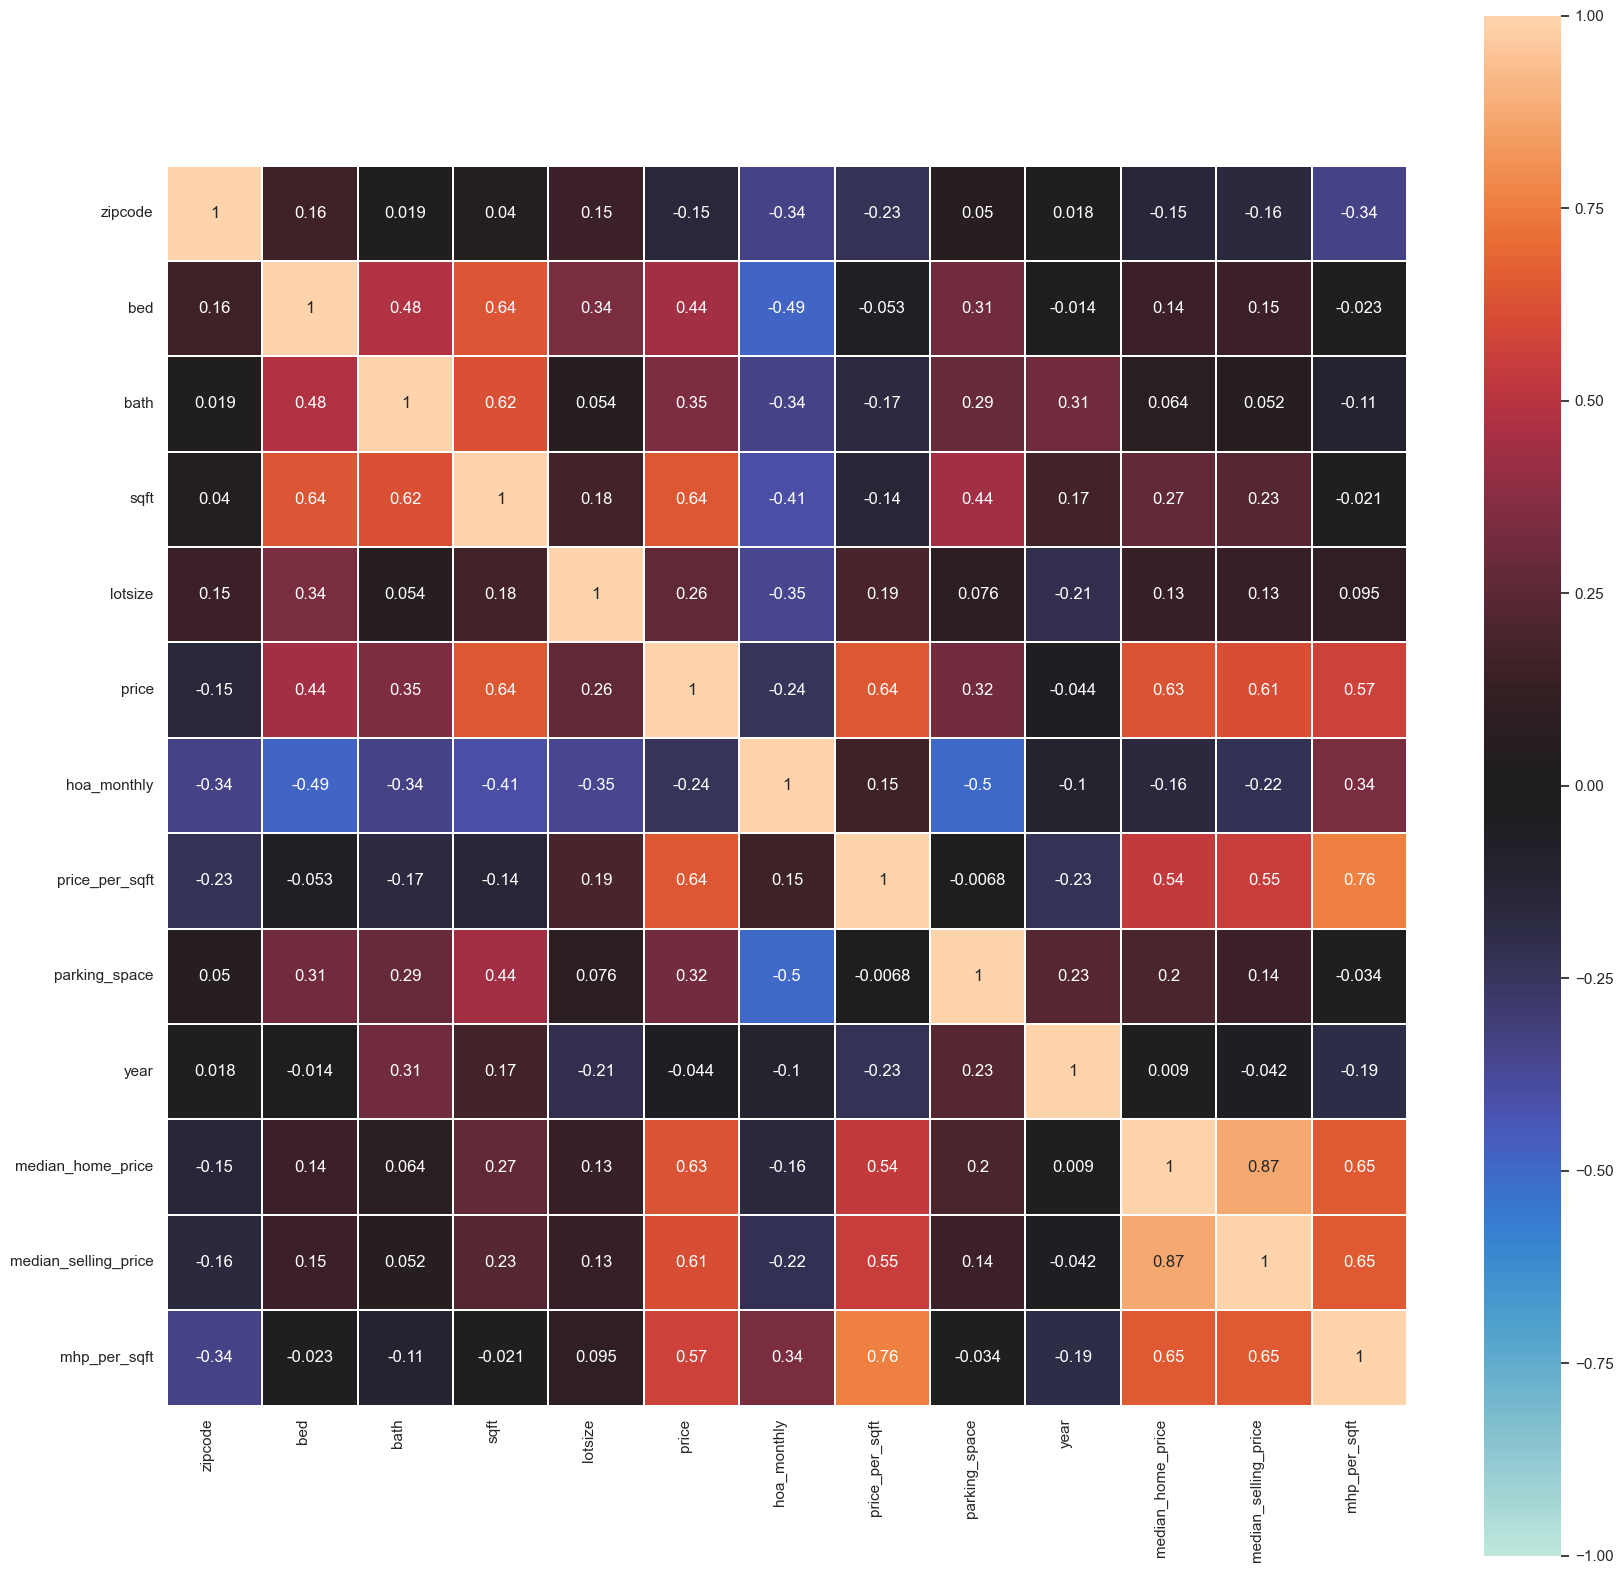

In [57]:
## correlation graph:

corr = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot = True,linewidths=.2
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

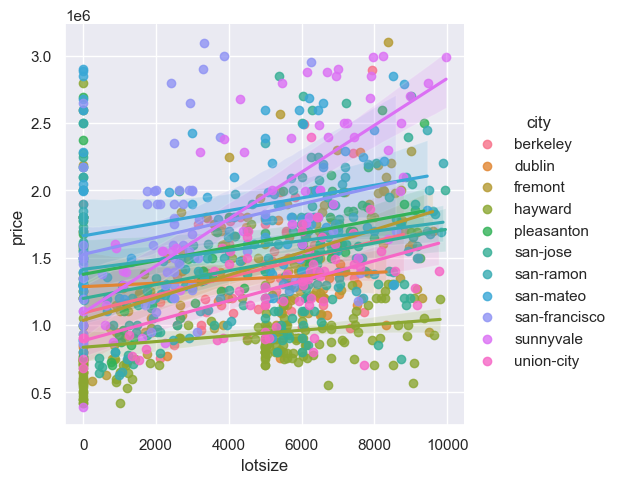

In [49]:
sns.lmplot(x = 'lotsize', y = 'price', data=df, hue = 'city')
sns.set(rc = {'figure.figsize':(10,10)})
plt.xlabel('lotsize')
plt.ylabel('price')
plt.show()

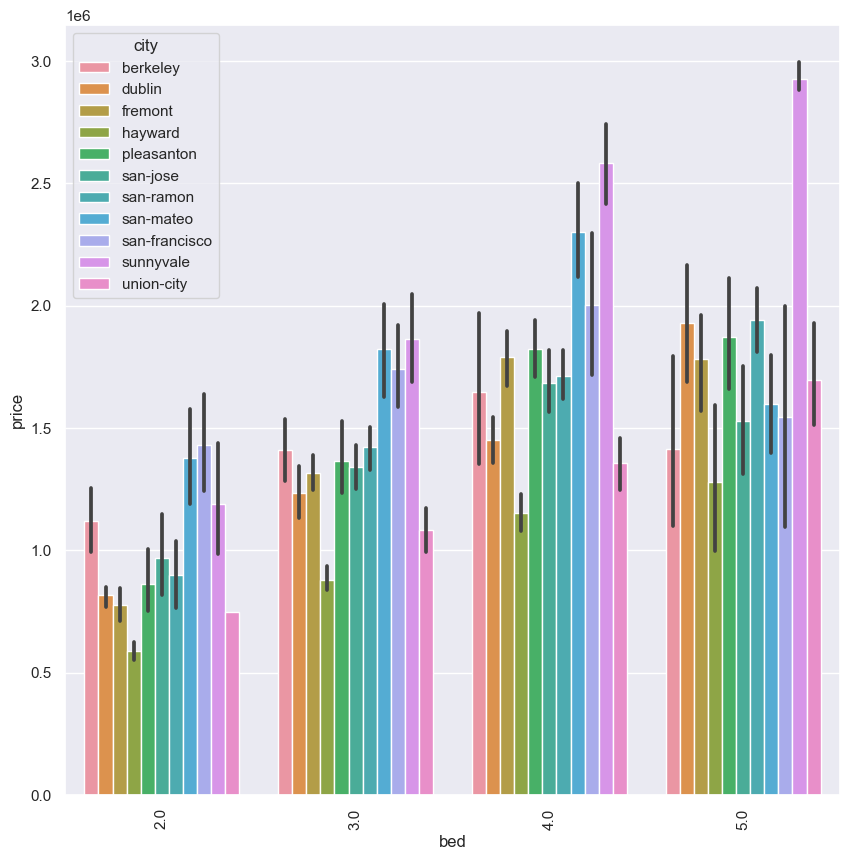

In [50]:
sns.barplot(x = "bed", y = "price", data=df, hue = "city")
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.show()

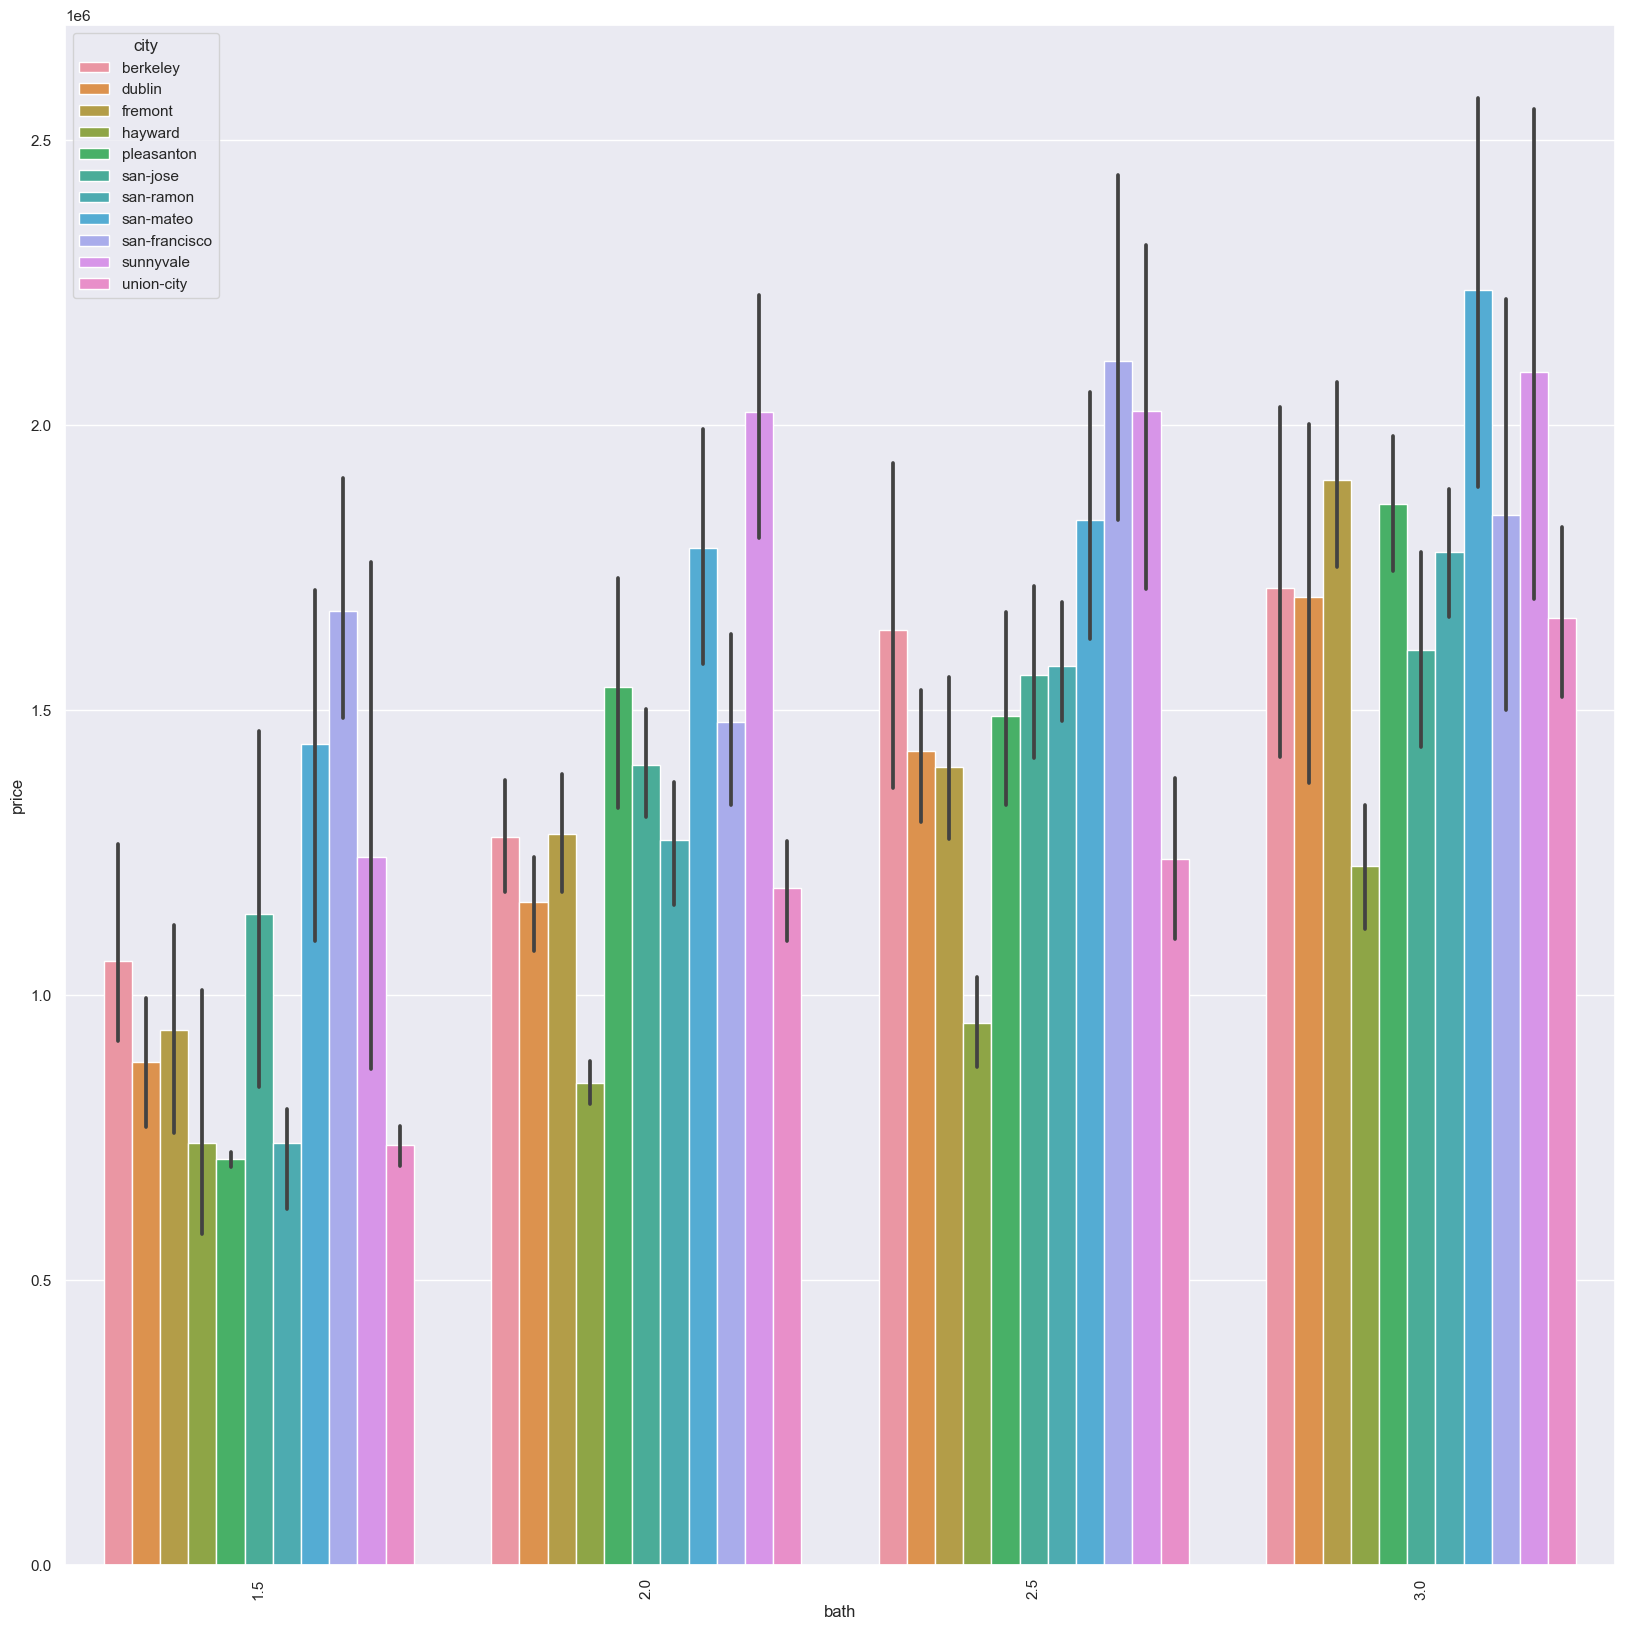

In [58]:
sns.barplot(x = "bath", y = "price", data=df, hue = "city")
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.show()

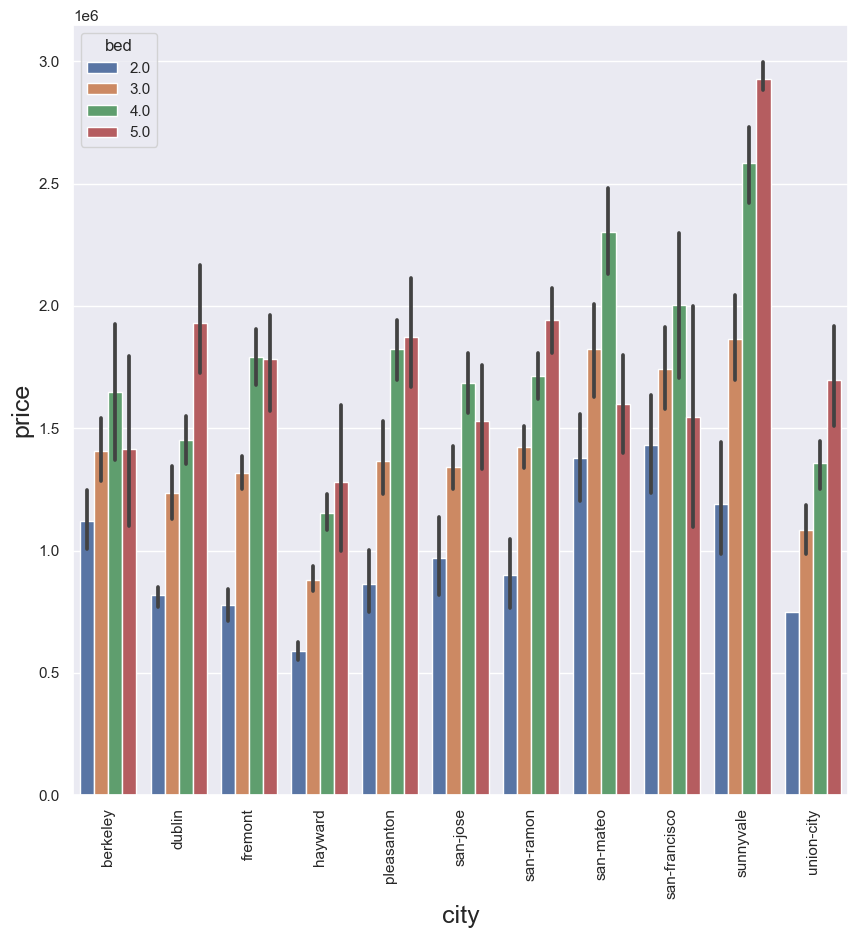

In [59]:
sns.barplot(x = "city", y = "price", data=df, hue = "bed")
sns.set(rc = {'figure.figsize':(15,15)})
plt.xticks(rotation=90)
plt.xlabel('city', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

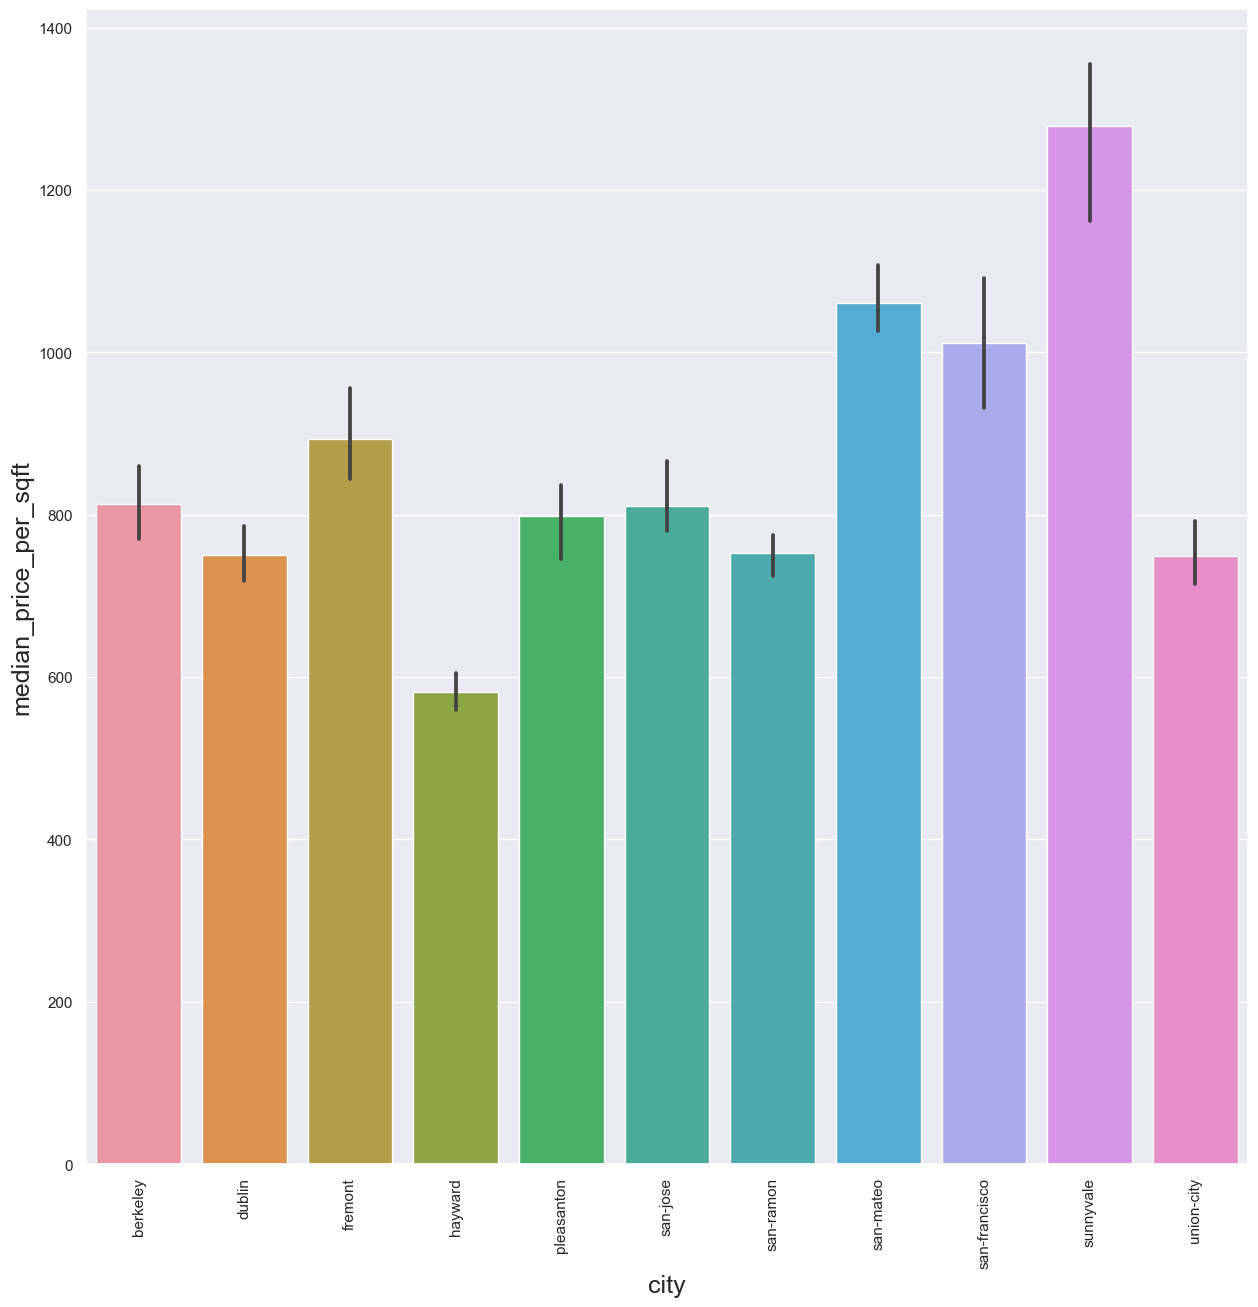

In [60]:
sns.barplot(x = "city", y = "price_per_sqft", data=df, estimator =median)
sns.set(rc = {'figure.figsize':(15,15)})
plt.xticks(rotation=90)
plt.xlabel('city', fontsize=18)
plt.ylabel('median_price_per_sqft', fontsize=18)
plt.show()

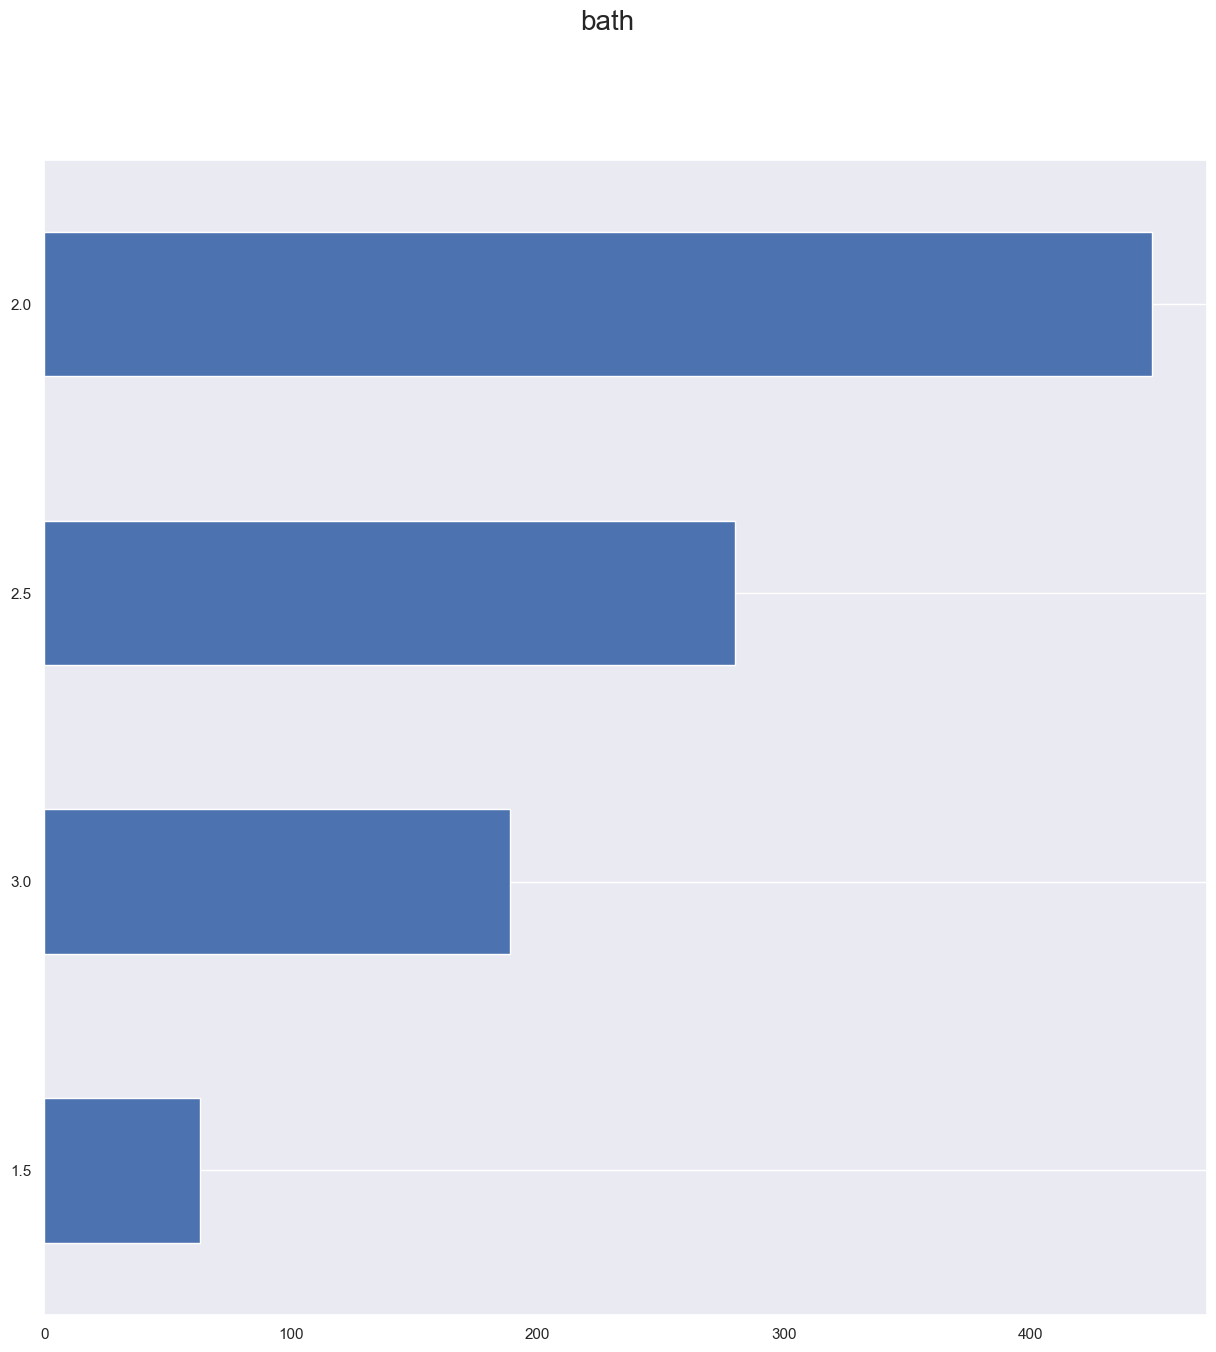

In [61]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

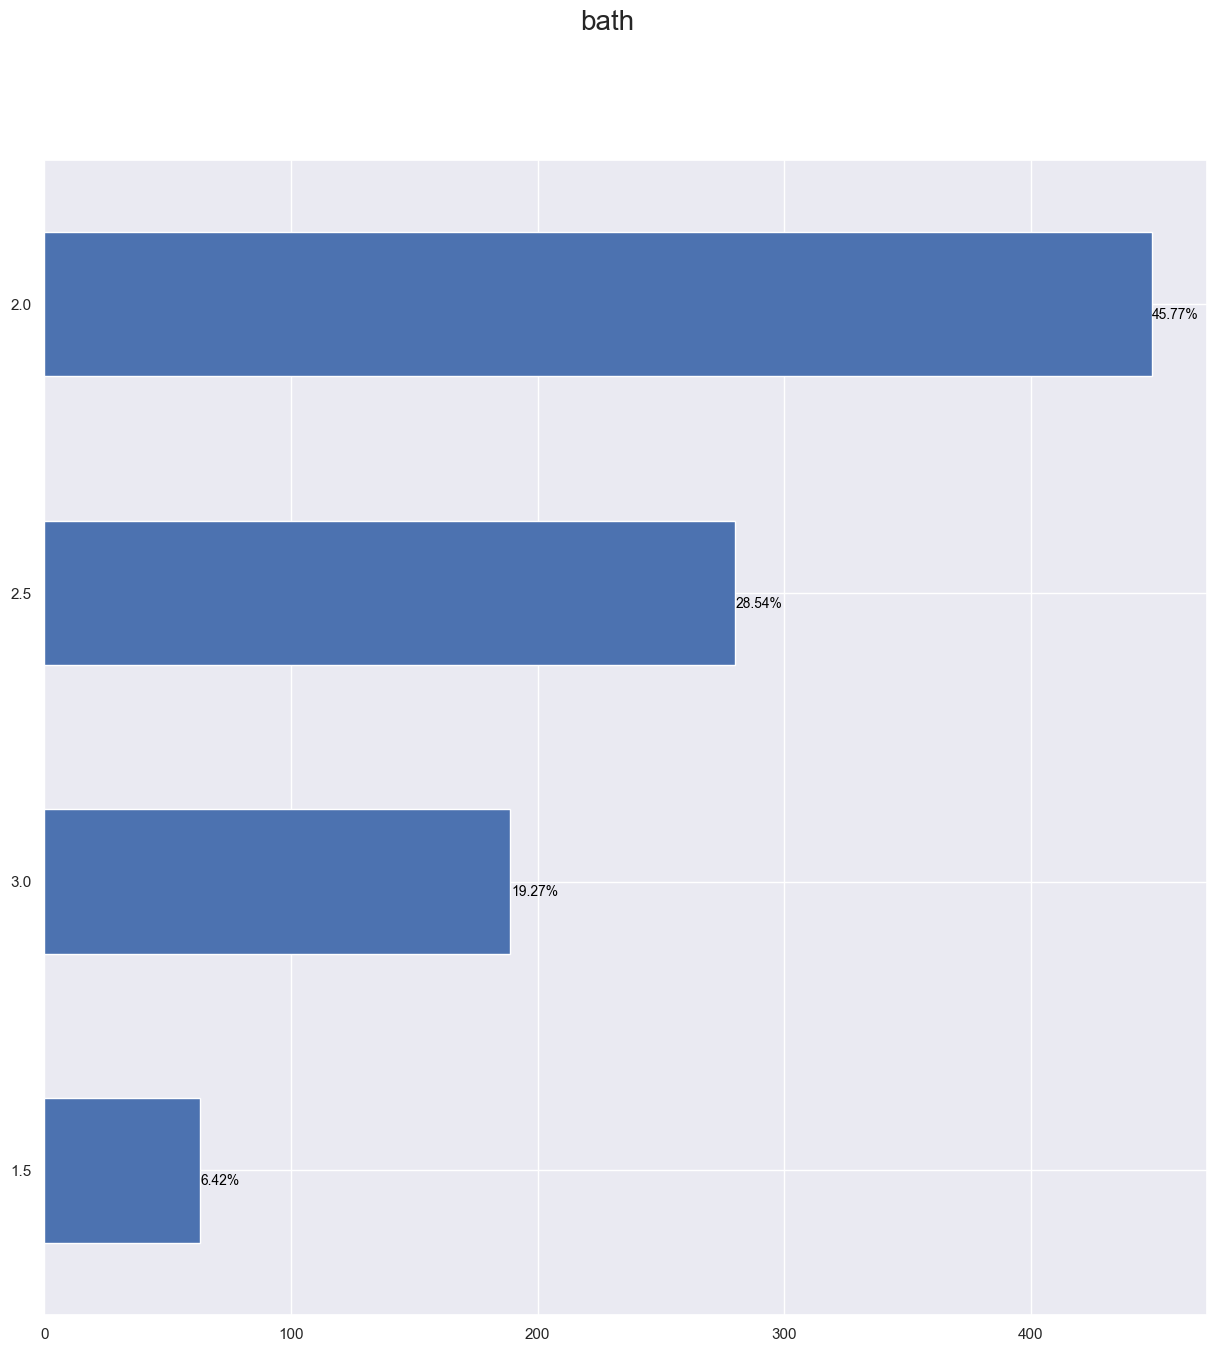

In [62]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

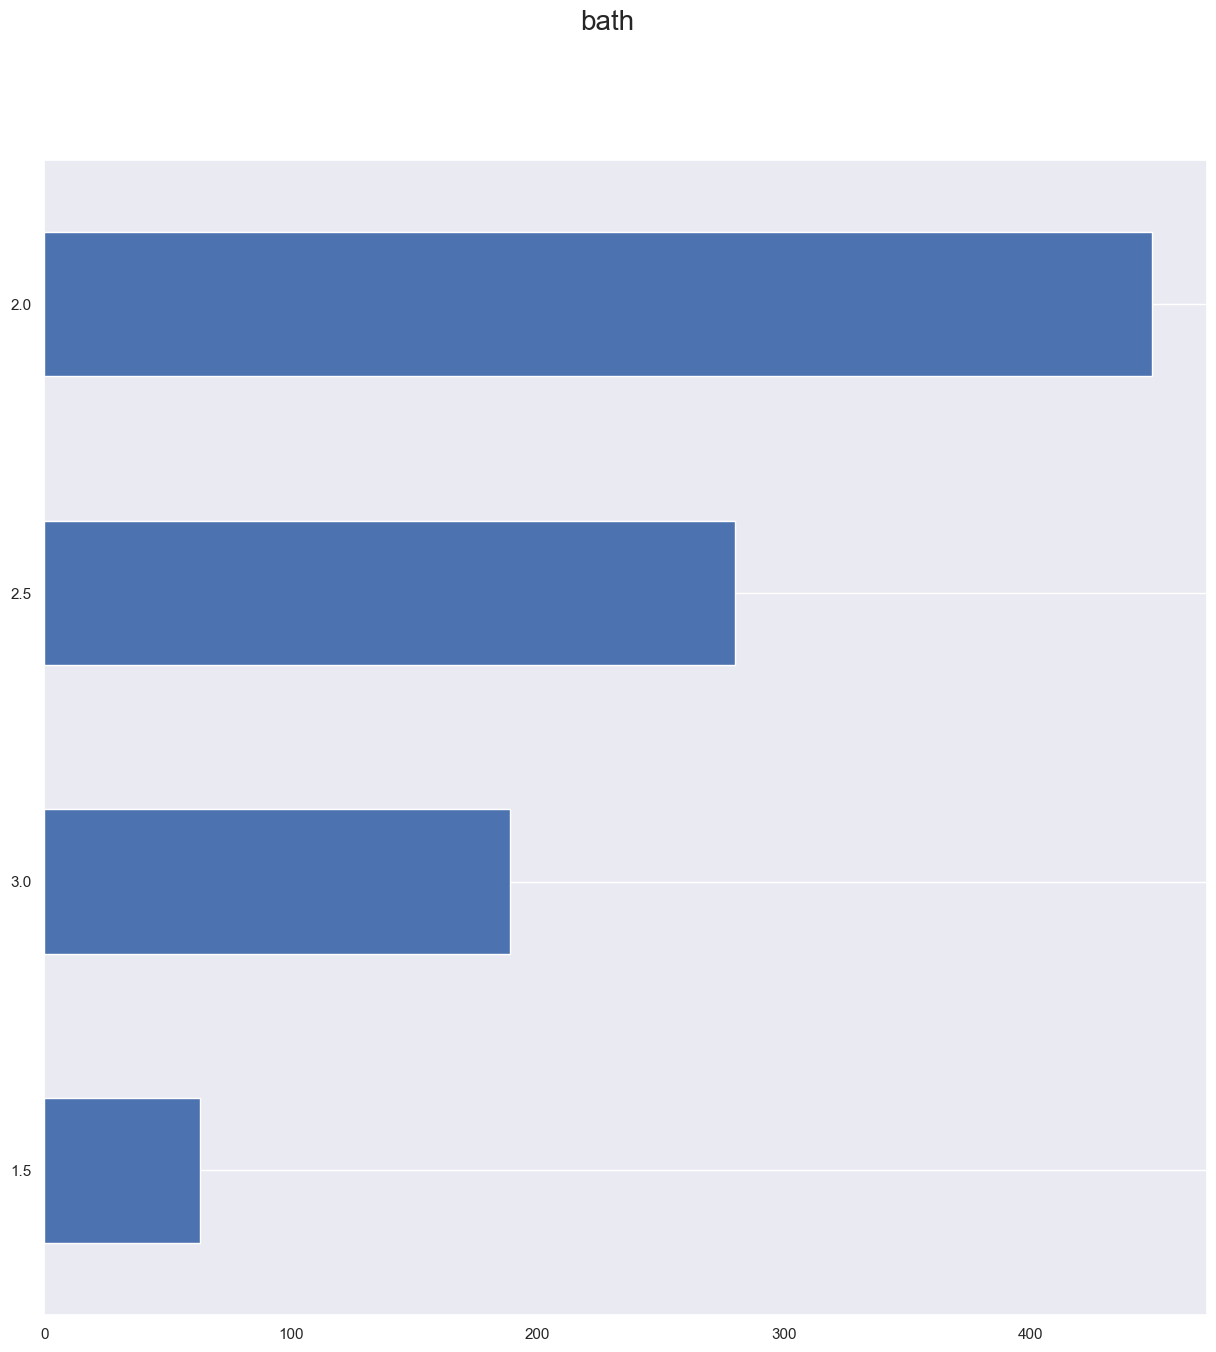

In [63]:
x = "bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

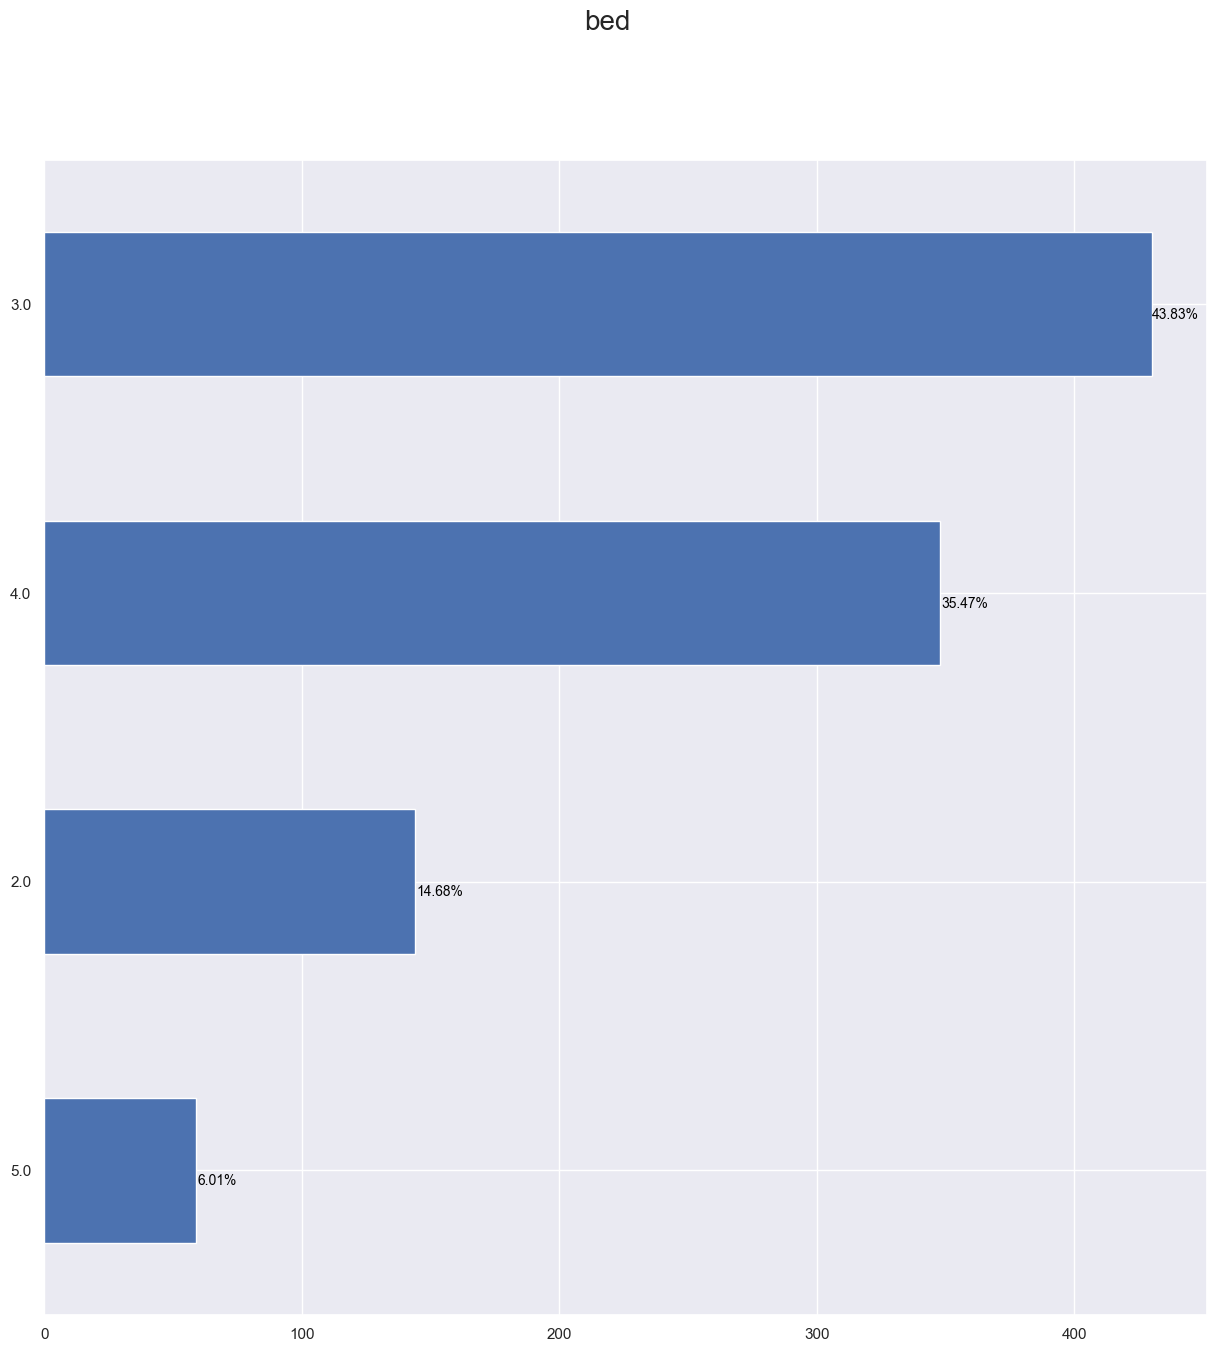

In [64]:
x = "bed"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.suptitle(x, fontsize=20)
plt.show()

In [65]:
df.columns

Index(['url', 'city', 'state', 'street_address', 'zipcode', 'bed', 'bath',
       'sqft', 'lotsize', 'price', 'property_type', 'hoa_monthly',
       'price_per_sqft', 'parking_space', 'year', 'median_home_price',
       'median_selling_price', 'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [66]:
df = df.drop('url', axis=1)

In [67]:
df.columns

Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'property_type', 'hoa_monthly', 'price_per_sqft',
       'parking_space', 'year', 'median_home_price', 'median_selling_price',
       'mhp_per_sqft', 'school_district', 'broker'],
      dtype='object')

In [68]:
df.dtypes

city                     object
state                    object
street_address           object
zipcode                   int64
bed                     float64
bath                    float64
sqft                    float64
lotsize                 float64
price                   float64
property_type            object
hoa_monthly             float64
price_per_sqft          float64
parking_space           float64
year                    float64
median_home_price       float64
median_selling_price    float64
mhp_per_sqft            float64
school_district          object
broker                   object
dtype: object

In [69]:
## one-hot encoding:

columnlst = ['property_type']
for i in columnlst:
    df[i] = df[i].astype('category')
    print(df[i].cat.categories)
    print(df[i].dtype)
    
one_hot_property_type = pd.get_dummies(df['property_type'], prefix = 'property_type', prefix_sep ='_', 
                            drop_first=False)

Index(['condo', 'mfd/mobile', 'multi-family', 'single family', 'townhome'], dtype='object')
category


In [70]:
df_regression = pd.concat([df.drop(['property_type'],axis = 1), one_hot_property_type], axis = 1)

In [71]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         981 non-null    object 
 1   state                        981 non-null    object 
 2   street_address               981 non-null    object 
 3   zipcode                      981 non-null    int64  
 4   bed                          981 non-null    float64
 5   bath                         981 non-null    float64
 6   sqft                         981 non-null    float64
 7   lotsize                      981 non-null    float64
 8   price                        981 non-null    float64
 9   hoa_monthly                  359 non-null    float64
 10  price_per_sqft               981 non-null    float64
 11  parking_space                790 non-null    float64
 12  year                         978 non-null    float64
 13  median_home_price   

In [72]:
print('Modified column titles with no space and one word for titles:')
df_regression.columns = [s.strip().replace(' ', '_') for s in df_regression.columns]
df_regression.columns

Modified column titles with no space and one word for titles:


Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'hoa_monthly', 'price_per_sqft', 'parking_space',
       'year', 'median_home_price', 'median_selling_price', 'mhp_per_sqft',
       'school_district', 'broker', 'property_type_condo',
       'property_type_mfd/mobile', 'property_type_multi-family',
       'property_type_single_family', 'property_type_townhome'],
      dtype='object')

In [73]:
df_regression["parking_space"].isnull().sum()
df_regression["parking_space"].fillna(df["parking_space"].mean(), inplace = True)
df_regression["parking_space"].isnull().sum()

0

In [74]:
df["median_home_price"].isnull().sum()
df["median_home_price"].fillna(df["median_home_price"].median(), inplace = True)
df["median_home_price"].isnull().sum()

0

In [75]:
df_regression["median_selling_price"].isnull().sum()
df_regression["median_selling_price"].fillna(df["median_selling_price"].median(), inplace = True)
df_regression["median_selling_price"].isnull().sum()

0

In [76]:
df_regression["mhp_per_sqft"].isnull().sum()
df_regression["mhp_per_sqft"].fillna(df["mhp_per_sqft"].median(), inplace = True)
df_regression["mhp_per_sqft"].isnull().sum()

0

In [77]:
df_regression["hoa_monthly"].isnull().sum()
df_regression["hoa_monthly"].fillna(df["hoa_monthly"].median(), inplace = True)
df_regression["hoa_monthly"].isnull().sum()

0

In [78]:
df_regression["year"].isnull().sum()
df_regression["year"].fillna(df["year"].mean(), inplace = True)
df_regression["year"].isnull().sum()

0

In [79]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         981 non-null    object 
 1   state                        981 non-null    object 
 2   street_address               981 non-null    object 
 3   zipcode                      981 non-null    int64  
 4   bed                          981 non-null    float64
 5   bath                         981 non-null    float64
 6   sqft                         981 non-null    float64
 7   lotsize                      981 non-null    float64
 8   price                        981 non-null    float64
 9   hoa_monthly                  981 non-null    float64
 10  price_per_sqft               981 non-null    float64
 11  parking_space                981 non-null    float64
 12  year                         981 non-null    float64
 13  median_home_price   

In [80]:
df_regression.to_csv('Data_Analysis_Pt2.csv', index = False)

In [81]:
df=pd.read_csv('Data_Analysis_Pt2.csv')

In [82]:
df.columns

Index(['city', 'state', 'street_address', 'zipcode', 'bed', 'bath', 'sqft',
       'lotsize', 'price', 'hoa_monthly', 'price_per_sqft', 'parking_space',
       'year', 'median_home_price', 'median_selling_price', 'mhp_per_sqft',
       'school_district', 'broker', 'property_type_condo',
       'property_type_mfd/mobile', 'property_type_multi-family',
       'property_type_single_family', 'property_type_townhome'],
      dtype='object')

In [97]:
predictors=['zipcode', 'lotsize', 'parking_space', 'year', 'property_type_condo',
       'property_type_multi-family', 'property_type_single_family']
outcome='price'

In [98]:
X=df[predictors]
y=df[outcome]

In [99]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state=3,test_size=0.25)

In [100]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(train_X, valid_X, train_y, valid_y)
print(models)

100%|███████████████████████████████████████████| 42/42 [00:05<00:00,  7.10it/s]

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
LGBMRegressor                                0.60       0.61   346549.87   
HistGradientBoostingRegressor                0.59       0.60   351616.39   
ExtraTreesRegressor                          0.58       0.59   354512.17   
GradientBoostingRegressor                    0.58       0.59   354810.15   
RandomForestRegressor                        0.57       0.59   358376.49   
XGBRegressor                                 0.54       0.56   370127.10   
BaggingRegressor                             0.51       0.52   384116.68   
KNeighborsRegressor                          0.49       0.50   392393.90   
AdaBoostRegressor                            0.34       0.36   444359.47   
ExtraTreeRegressor                           0.34       0.36   444583.89   
PoissonRegressor                             0.28       0.30   466624.90   
LassoLarsIC 

# Model RMSE and R-Squared

In [103]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, LR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# Linear Regression

In [104]:
##Linear Regression:
LR_price = LinearRegression()
LR_price.fit(train_X, train_y)
LR_price_pred = LR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': LR_price_pred, 
                       'Residual': valid_y - LR_price_pred}), 2)
print(result.head(15))
print(rmse(LR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, LR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1572321.92 -234321.92
194 1999888.00 1634663.37  365224.63
620 1798000.00 1284527.44  513472.56
58  1649000.00 1599835.78   49164.22
415  965000.00  779070.87  185929.13
825 1698000.00 1425847.02  272152.98
525 1150777.00 1339779.10 -189002.10
201 1799000.00 1610410.92  188589.08
157 1199000.00 1580640.87 -381640.87
639 1188000.00 1030691.98  157308.02
846 2349000.00 1663618.57  685381.43
676 2199000.00 1921017.50  277982.50
103  950000.00 1034399.35  -84399.35
680 2170000.00 1628433.22  541566.78
749 1338000.00 1099643.80  238356.20
R-squared: 0.29307333895843224
Mean Squared Error: 467931.4650670065
None


361301.5627240738

In [105]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, LGBM_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# LGBM Regressor

In [106]:
##LGBM Regressor:
import lightgbm as ltb
LGBM_price = ltb.LGBMRegressor()
LGBM_price.fit(train_X, train_y)
LGBM_price_pred = LGBM_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': LGBM_price_pred, 
                       'Residual': valid_y - LGBM_price_pred}), 2)
print(result.head(15))
print(rmse(LGBM_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, LGBM_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1408745.73  -70745.73
194 1999888.00 2227334.18 -227446.18
620 1798000.00 1663084.64  134915.36
58  1649000.00 1554768.42   94231.58
415  965000.00  803352.68  161647.32
825 1698000.00 2115272.60 -417272.60
525 1150777.00 1556516.98 -405739.98
201 1799000.00 1729419.56   69580.44
157 1199000.00 1436020.70 -237020.70
639 1188000.00  934599.73  253400.27
846 2349000.00 1594359.14  754640.86
676 2199000.00 2140271.52   58728.48
103  950000.00 1231240.29 -281240.29
680 2170000.00 1817334.00  352666.00
749 1338000.00 1426044.20  -88044.20
R-squared: 0.6075343069342829
Mean Squared Error: 348655.0167650648
None


244612.63722140118

In [107]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, ETR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# ExtraTreesRegressor

In [108]:
##ExtraTreesRegressor:
from sklearn.ensemble import ExtraTreesRegressor
ETR_price = ExtraTreesRegressor()
ETR_price.fit(train_X, train_y)
ETR_price_pred = ETR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': ETR_price_pred, 
                       'Residual': valid_y - ETR_price_pred}), 2)
print(result.head(15))
print(rmse(ETR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, ETR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1526730.00 -188730.00
194 1999888.00 1739412.24  260475.76
620 1798000.00 1668692.04  129307.96
58  1649000.00 1486626.59  162373.41
415  965000.00  753084.98  211915.02
825 1698000.00 1628950.00   69050.00
525 1150777.00 1781478.82 -630701.82
201 1799000.00 1814572.00  -15572.00
157 1199000.00 1328454.68 -129454.68
639 1188000.00 1062622.97  125377.03
846 2349000.00 1416800.00  932200.00
676 2199000.00 1806078.55  392921.45
103  950000.00 1002837.35  -52837.35
680 2170000.00 1901756.00  268244.00
749 1338000.00 1187227.98  150772.02
R-squared: 0.5857044525173452
Mean Squared Error: 358220.30708488374
None


258460.2493292683

In [109]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, RFR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# Random Forest Regressor

In [110]:
##RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor
RFR_price = RandomForestRegressor()
RFR_price.fit(train_X, train_y)
RFR_price_pred = RFR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': RFR_price_pred, 
                       'Residual': valid_y - RFR_price_pred}), 2)
print(result.head(15))
print(rmse(RFR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, RFR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1402444.95  -64444.95
194 1999888.00 2077806.05  -77918.05
620 1798000.00 1715600.80   82399.20
58  1649000.00 1497605.60  151394.40
415  965000.00  794271.40  170728.60
825 1698000.00 1906680.00 -208680.00
525 1150777.00 1580226.81 -429449.81
201 1799000.00 1722353.95   76646.05
157 1199000.00 1517104.58 -318104.58
639 1188000.00  904956.19  283043.81
846 2349000.00 1556968.85  792031.15
676 2199000.00 1949827.44  249172.56
103  950000.00  977785.49  -27785.49
680 2170000.00 1859090.00  310910.00
749 1338000.00 1292607.46   45392.54
R-squared: 0.5847112709726776
Mean Squared Error: 358649.426865098
None


255021.4044034069

In [111]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, BR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# Bagging Regressor

In [112]:
##BaggingRegressor:
from sklearn.ensemble import BaggingRegressor
BR_price = BaggingRegressor()
BR_price.fit(train_X, train_y)
BR_price_pred = BR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': BR_price_pred, 
                       'Residual': valid_y - BR_price_pred}), 2)
print(result.head(15))
print(rmse(BR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, BR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1337300.00     700.00
194 1999888.00 1983595.00   16293.00
620 1798000.00 2105377.60 -307377.60
58  1649000.00 1590000.00   59000.00
415  965000.00  796000.00  169000.00
825 1698000.00 2061700.00 -363700.00
525 1150777.00 1704099.40 -553322.40
201 1799000.00 1478500.00  320500.00
157 1199000.00 1577300.00 -378300.00
639 1188000.00  992466.50  195533.50
846 2349000.00 1446600.00  902400.00
676 2199000.00 1791544.00  407456.00
103  950000.00  922550.00   27450.00
680 2170000.00 1724500.00  445500.00
749 1338000.00 1242780.00   95220.00
R-squared: 0.5775675917982936
Mean Squared Error: 361720.9672087586
None


257099.15593689505

In [113]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, GBR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# GradientBoosting Regressor

In [114]:
#GradientBoosting Regressor
GBR_price = GradientBoostingRegressor()
GBR_price.fit(train_X, train_y)
GBR_price_pred = GBR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': GBR_price_pred, 
                       'Residual': valid_y - GBR_price_pred}), 2)
print(result.head(15))
print(rmse(GBR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, GBR_price_pred)

<IPython.core.display.Javascript object>

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1353776.34  -15776.34
194 1999888.00 2046797.79  -46909.79
620 1798000.00 1592814.20  205185.80
58  1649000.00 1482671.19  166328.81
415  965000.00  857637.86  107362.14
825 1698000.00 2027559.55 -329559.55
525 1150777.00 1452504.51 -301727.51
201 1799000.00 1762775.82   36224.18
157 1199000.00 1510678.71 -311678.71
639 1188000.00  968645.84  219354.16
846 2349000.00 1779762.51  569237.49
676 2199000.00 2151611.20   47388.80
103  950000.00 1456749.16 -506749.16
680 2170000.00 1685454.22  484545.78
749 1338000.00 1366101.45  -28101.45
R-squared: 0.592944751690842
Mean Squared Error: 355076.3510779238
None


251233.92086427228

In [115]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, HGBR_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# HistGradientBoosting Regressor

In [116]:
#HistGradientBoosting Regressor
from sklearn.ensemble import HistGradientBoostingRegressor
HGBR_price = HistGradientBoostingRegressor()
HGBR_price.fit(train_X, train_y)
HGBR_price_pred = HGBR_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': HGBR_price_pred, 
                       'Residual': valid_y - HGBR_price_pred}), 2)
print(result.head(15))
print(rmse(HGBR_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, HGBR_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1373783.37  -35783.37
194 1999888.00 2259231.39 -259343.39
620 1798000.00 1628077.02  169922.98
58  1649000.00 1564005.76   84994.24
415  965000.00  833698.10  131301.90
825 1698000.00 2175019.54 -477019.54
525 1150777.00 1537484.50 -386707.50
201 1799000.00 1770094.97   28905.03
157 1199000.00 1482469.64 -283469.64
639 1188000.00  911904.48  276095.52
846 2349000.00 1644941.22  704058.78
676 2199000.00 2121951.63   77048.37
103  950000.00 1176338.26 -226338.26
680 2170000.00 1809173.72  360826.28
749 1338000.00 1418940.54  -80940.54
R-squared: 0.6008358330302545
Mean Squared Error: 351617.79226172494
None


246976.10336539647

In [117]:
## Model RMSE and R-Squared:
def rmse(model,train_X, valid_X, train_y, valid_y):
    r_squared = model.score(valid_X, valid_y)
    mse = mean_squared_error(valid_y, XGB_price_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

# XGBRegressor

In [118]:
##XGBRegressor:
from xgboost import XGBRegressor
XGB_price = XGBRegressor()
XGB_price.fit(train_X, train_y)
XGB_price_pred = XGB_price.predict(valid_X)
print('Actual, Prediction, and Residual Prices for Validation Set\n\n')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': XGB_price_pred, 
                       'Residual': valid_y - XGB_price_pred}), 2)
print(result.head(15))
print(rmse(XGB_price,train_X, valid_X, train_y, valid_y))
mae(valid_y, XGB_price_pred)

Actual, Prediction, and Residual Prices for Validation Set


        Actual  Predicted   Residual
971 1338000.00 1328038.88    9961.12
194 1999888.00 2343275.25 -343387.25
620 1798000.00 1789482.50    8517.38
58  1649000.00 1287320.75  361679.25
415  965000.00  663786.31  301213.69
825 1698000.00 1894996.75 -196996.88
525 1150777.00 1486556.38 -335779.25
201 1799000.00 1813741.50  -14741.38
157 1199000.00 1315660.25 -116660.25
639 1188000.00  968920.94  219079.00
846 2349000.00 1464048.00  884952.00
676 2199000.00 2253135.75  -54135.75
103  950000.00  920715.38   29284.62
680 2170000.00 1909839.25  260160.75
749 1338000.00 1267977.75   70022.25
R-squared: 0.5569332429445695
Mean Squared Error: 370450.0452414826
None


256924.881351626